<a href="https://colab.research.google.com/github/moii789/CNN_practice/blob/main/pytroch_practice_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [ ]:
train_df = pd.read_csv('train.csv')

In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0




```
# 784 pixels in each image (28 * 28). each pixel has values ranging from 0-255
```



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


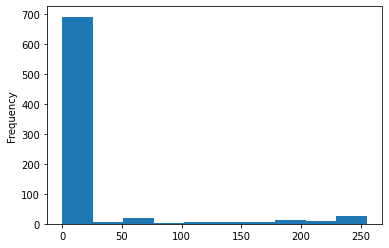

In [ ]:
train_df.iloc[3, 1:].plot(kind='hist')

In [ ]:
class MNIST_dataset(Dataset):
    def __init__(self, df, rows=42000):
        self.imgnp = df.iloc[:rows, 1:].values
        self.labels = df.iloc[:rows, 0].values
        self.rows = rows
    
    def __len__(self):
        return self.rows
    
    def __getitem__(self, idx):
        image = torch.tensor(self.imgnp[idx], dtype=torch.float) / 255  # Normalize
        image = image.view(1, 28, 28)  # (channel, height, width)
        label = self.labels[idx]
        return (image, label)

In [ ]:
train_loader = DataLoader(MNIST_dataset(train_df, train_df.shape[0]), batch_size = 4, shuffle = True)

In [ ]:
dataiter= iter(train_loader)

In [ ]:
images,labels = dataiter.next()

In [ ]:
images.size(), labels.size()

(torch.Size([4, 1, 28, 28]), torch.Size([4]))

In [ ]:
class Net(nn.Module):

  def __init__(self):

    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16 * 4 * 4, 120) #come back here
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)


  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
    

In [ ]:
t = torch.rand(4, 4)
b = t.view(-1, 16)

In [ ]:
print(t)

tensor([[0.7615, 0.1833, 0.9849, 0.1348],
        [0.3708, 0.2408, 0.5681, 0.0504],
        [0.7052, 0.8088, 0.0643, 0.4554],
        [0.1810, 0.7047, 0.1644, 0.1272]])


In [ ]:
print(b)

tensor([[0.7615, 0.1833, 0.9849, 0.1348, 0.3708, 0.2408, 0.5681, 0.0504, 0.7052,
         0.8088, 0.0643, 0.4554, 0.1810, 0.7047, 0.1644, 0.1272]])


In [ ]:
net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

In [ ]:
running_loss_list = []
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):#i = 0 will have 4 samples, i = 1 will have 4 samples
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 800 == 799:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 800)
                 )
            running_loss_list.append(running_loss)
            running_loss = 0.0
print('Finished Training')

[1,   800] loss: 1.174
[1,  1600] loss: 0.391
[1,  2400] loss: 0.425
[1,  3200] loss: 0.316
[1,  4000] loss: 0.301
[1,  4800] loss: 0.324
[1,  5600] loss: 0.246
[1,  6400] loss: 0.264
[1,  7200] loss: 0.241
[1,  8000] loss: 0.237
[1,  8800] loss: 0.250
[1,  9600] loss: 0.226
[1, 10400] loss: 0.425
[2,   800] loss: 0.382
[2,  1600] loss: 0.335
[2,  2400] loss: 0.342
[2,  3200] loss: 0.437
[2,  4000] loss: 0.297
[2,  4800] loss: 0.225
[2,  5600] loss: 0.647
[2,  6400] loss: 0.459
[2,  7200] loss: 0.496
[2,  8000] loss: 0.445
[2,  8800] loss: 0.360
[2,  9600] loss: 0.460
[2, 10400] loss: 0.349
Finished Training


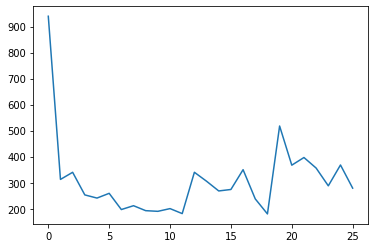

In [ ]:
plt.plot(running_loss_list)

In [ ]:
#Loss is divergent so we should reduce the learning rate

In [ ]:
net = Net()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

running_loss_list = []
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 800 == 799:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 200)
                 )
            running_loss_list.append(running_loss)
            running_loss = 0.0
print('Finished Training')

[1,   800] loss: 8.948
[1,  1600] loss: 3.688
[1,  2400] loss: 1.764
[1,  3200] loss: 1.285
[1,  4000] loss: 0.945
[1,  4800] loss: 0.734
[1,  5600] loss: 0.680
[1,  6400] loss: 0.691
[1,  7200] loss: 0.555
[1,  8000] loss: 0.550
[1,  8800] loss: 0.569
[1,  9600] loss: 0.470
[1, 10400] loss: 0.500
[2,   800] loss: 0.401
[2,  1600] loss: 0.379
[2,  2400] loss: 0.380
[2,  3200] loss: 0.363
[2,  4000] loss: 0.329
[2,  4800] loss: 0.414
[2,  5600] loss: 0.359
[2,  6400] loss: 0.320
[2,  7200] loss: 0.328
[2,  8000] loss: 0.312
[2,  8800] loss: 0.289
[2,  9600] loss: 0.282
[2, 10400] loss: 0.373
Finished Training


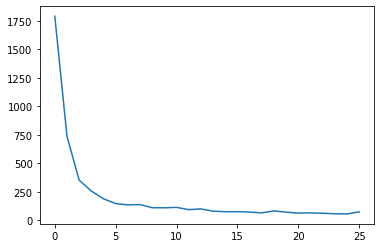

In [ ]:
plt.plot(running_loss_list)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in train_loader:
    inputs, labels = data

    outputs = net(inputs)
    _,predicted = torch.max(outputs.data, 1)
    total += labels.shape[0]
    correct += (labels == predicted).sum().item()

print('Accuracy for the training set is', correct/total * 100)

Accuracy for the training set is 98.30238095238096


In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_df.shape

(28000, 784)

In [ ]:
test_tensor = torch.tensor(test_df.values, dtype = torch.float)/255
test_tensor = test_tensor.view(-1,1,28,28)

In [ ]:
outputs = net(test_tensor)
_,predicted = torch.max(outputs, 1)